In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [9]:
DB = '../data/checking-logs.sqlite'
conn = sqlite3.connect(DB)

query = """
SELECT uid, timestamp AS datetime
FROM checker
WHERE uid LIKE 'user_%'
"""
data = pd.read_sql(query,conn)
conn.close()
data

,uid,datetime
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [10]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday

data.head(50)

,uid,datetime,hour,weekday
0,user_4,2020-04-17 05:19:02.744528,5,4
1,user_4,2020-04-17 05:22:35.249331,5,4
2,user_4,2020-04-17 05:22:45.549397,5,4
3,user_4,2020-04-17 05:34:14.691200,5,4
4,user_4,2020-04-17 05:34:24.422370,5,4
5,user_4,2020-04-17 05:43:18.546760,5,4
6,user_4,2020-04-17 05:43:27.773992,5,4
7,user_4,2020-04-17 05:46:22.151752,5,4
8,user_4,2020-04-17 05:46:32.275104,5,4
9,user_4,2020-04-17 05:50:17.757425,5,4


In [11]:
grouped_weekday = data.groupby(['uid',data['datetime'].dt.date,'weekday']).size().reset_index(name='count')
grouped_hour = data.groupby(['uid',data['datetime'].dt.date,'hour']).size().reset_index(name='count')
grouped_weekday

,uid,datetime,weekday,count
0,user_0,2020-04-20,0,3
1,user_1,2020-04-26,6,22
2,user_1,2020-05-02,5,1
3,user_1,2020-05-03,6,20
4,user_1,2020-05-14,3,23
...,...,...,...,...
244,user_8,2020-05-02,5,39
245,user_8,2020-05-03,6,3
246,user_8,2020-05-10,6,4
247,user_8,2020-05-14,3,15


In [12]:
df_weekday = grouped_weekday.groupby(['uid','weekday'])['count'].sum().unstack(fill_value=0)
df_weekday = df_weekday.reindex(columns=[i for i in range(7)],fill_value=0)
df_weekday['Total'] = df_weekday.sum(axis=1)

df_weekday = df_weekday.sort_values(by='Total',ascending=False)
df_weekday.drop(columns='Total',inplace=True)
df_weekday = df_weekday.T
df_weekday

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
0,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,0,2,0,3
1,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,0,5,3,0,0
2,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,0,3,0,0,0
3,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,0,2,6,0
4,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
5,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
6,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,8,0,1,0,0


In [13]:
df_hour = grouped_hour.groupby(['uid','hour'])['count'].sum().unstack(fill_value=0)
df_hour = df_hour.reindex(columns=[i for i in range(24)],fill_value=0)
df_hour['Total'] = df_hour.sum(axis=1)

df_hour = df_hour.sort_values(by='Total',ascending=False)
df_hour.drop(columns='Total',inplace=True)
df_hour = df_hour.T




df_hour

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,0,1,0,1,0


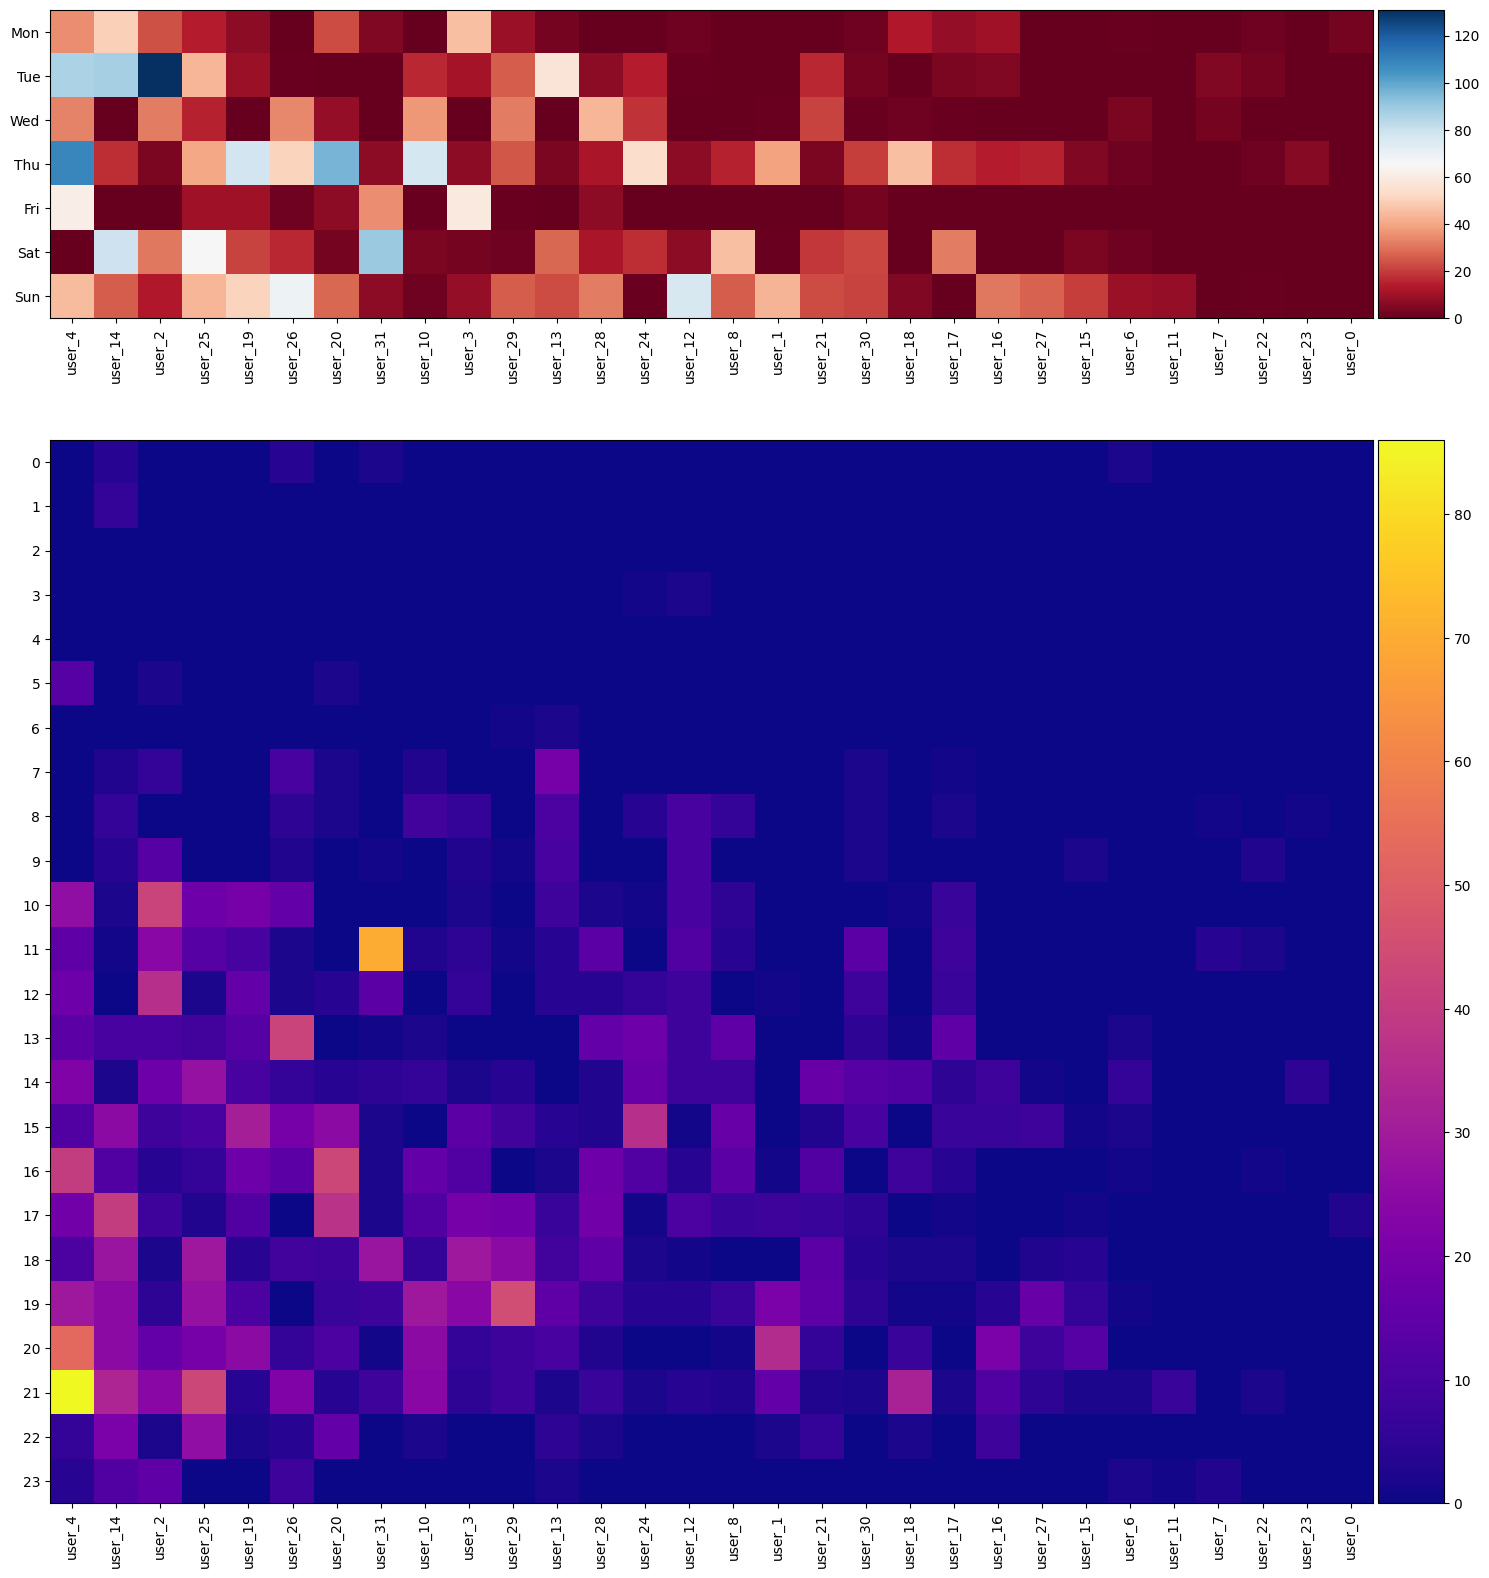

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 17), gridspec_kw={'height_ratios': [1, 2]})

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
im1 = ax1.imshow(df_weekday, cmap='RdBu', aspect=1)
ax1.set_xticks(range(len(list(df_weekday.columns))))
ax1.set_xticklabels(list(df_weekday.columns), rotation=90)
ax1.set_yticks(range(7))
ax1.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
fig.colorbar(im1, cax=cax1)


divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
im2 = ax2.imshow(df_hour, cmap='plasma', aspect="auto")

ax2.set_xticks(range(len(list(df_hour.columns))))
ax2.set_xticklabels(list(df_hour.columns), rotation=90)

ax2.set_yticks(range(24))
ax2.set_yticklabels(list(range(24)))

fig.colorbar(im2, cax=cax2)

plt.tight_layout()

Which user has the most commits on Tue?

The answer: user_2.

Which user has the most commits on Thu? 

The answer: user_4.

On which weekday do the users not like making a lot of commits?

The answer, Friday.

Which user at which hour made the largest number of commits? 

The answer, for example: user_4, 21